In [12]:
import numpy as np
from numpy.linalg import eig
import scipy.linalg as la

In [17]:
A = np.array([[2, 1], 
              [1, 2]])
w,v=la.eig(A)
print('E-value:', w)
print('E-vector', v)

E-value: [3.+0.j 1.+0.j]
E-vector [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [14]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd

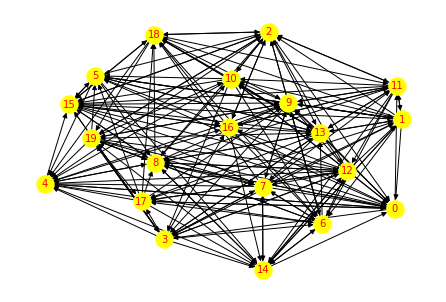

In [18]:
# created a directed graph
N=20
graph=nx.gnp_random_graph(N,0.5,directed=True)
#draw a graph
nx.draw(graph,with_labels=True,font_color='red',font_size=10,node_color='yellow')
#plot a graph
plt.show()

In [19]:
M = nx.adjacency_matrix(graph).todense()
print(M)

[[0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0]
 [1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1]
 [0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1]
 [1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0]
 [0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0]
 [1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0]
 [1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1]
 [1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0]
 [1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0]
 [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1]
 [1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0]]


In [21]:
#Page Rank Algorithm-Calculating random walk score
#initialising the dictionary which contains key as node and value as random walk score
rank_dict={}
# taking a random node as the starting node:
x=rd.randint(0,N)
#Setting random walk score of each node to zero
for j in range(0,N):
  rank_dict[j]=0
#Incrementing score of starting node
rank_dict[x]=rank_dict[x]+1
#iterating process for 1000 times and updating score
for i in range(1000):
  #storing list of neighboring nodes in list
  list_n=list(graph.neighbors(x))
  #if length of list is zero then taking another node and process starts
  if(len(list_n)==0):
    x=rd.randint(0,N)
    rank_dict[x]=rank_dict[x]+1
  #else choose any node from the list and continue the process by updating score to that node
  else:
    x=rd.choice(list_n)
    rank_dict[x]=rank_dict[x]+1
print("Score Updated")

Score Updated


In [22]:
#normalising values
for j in range(0,N):
  rank_dict[j]=rank_dict[j]/1000
#Page rank by networkx library
pagerank=nx.pagerank(graph)
#sorting both dictionaries based on items
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)
#sorting the rank_dict based on values
rank_dict_sorted=sorted(rank_dict.items(),key=lambda v:(v[1],v[0]),reverse=True)
#display the order
print("The order generated by implementation algorithm is\n")
for i in rank_dict_sorted:
  print(i[0],end=" ")

The order generated by implementation algorithm is

8 0 2 12 14 4 9 3 15 13 18 6 16 5 11 7 10 1 19 17 